# 텍스트 빈도 분석 -4 네이버 리뷰

## 0)필요한 모듈 설치

In [ ]:
!pip install wordcloud

In [ ]:
!pip install xlrd

In [ ]:
!pip install konlpy

In [ ]:
import nltk
nltk.download()

## 1) 필요한 모듈 import

In [9]:
# import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import STOPWORDS, WordCloud

import pandas as pd
# import glob
# from functools import reduce
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

## 2) 데이터 load

In [11]:
import urllib.request

#네이버 쇼핑 리뷰 데이터
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
total_data

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


## 3) 데이터 전처리

In [36]:
# 데이터가 너무 많아서 처리가 힘드므로, 1만 개의 리뷰만 가져옴
reviews = ''
for item in total_data['reviews'].iloc[0:10001]:
    reviews += re.sub(r'[^\w]', ' ', item) + ' '
reviews

'배공빠르고 굿 택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고 아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다  바느질이 조금 엉성하긴 하지만 편하고 가성비 최고예요  선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다  전화했더니 바로주신다했지만 배송도 누락되어있었네요   확인안하고 바로 선물했으면 큰일날뻔했네요  이렇게 배송이 오래걸렸으면 사는거 다시 생각했을거같아요 아쉽네요   민트색상 예뻐요  옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ 비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적으로 보였는데 생각보다 진짜 별로입니다  주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화도 안되고 아무런 연락을 받을수가 없으니 답답하신 분들은 다른곳에서 사시는거 추천드립니다 넉넉한 길이로 주문했는데도 안 맞네요 별로예요 보폴이 계속 때처럼 나오다가 지금은 안나네요  110인데 전문속옷브랜드 위생팬티105보다 작은듯해요  불편해요  밴딩부분이 다 신축성없는 일반실로 되어있어 빅사이즈임에도 빅사이즈같지않아요  입고벗을때 편하게 밴딩부분이 늘어나고 입었을때도 밴딩이 잡아주어야하는데 말이죠  사이즈도 딱이고 귀엽고 넘 좋아요 ㅎㅎ 베이지 색 구매했는데 약간 살색에 가까워요 화면빨인가봐요   노란컬러가 돋보여요   저렴한맛에 그냥 씁니다 별루 ㅏㅛㅇ치ㅗ티ㅓ치ㅗ탛캏타ㅗ티ㅗ티ㅗ티ㅛ티ㅛ티ㅗㅗㅗ치ㅕ치ㅕ쳐ㅣ처ㅣ치ㅓ처ㅣ펴ㅣ쳐ㅣ치ㅕㅐㅛㅌ쵸ㅔ려ㅔㅎ 촉감도 좋고 무게감이나 핏도 편합니다 불멍하기좋고 사이즈도 너무 좋아요 재구매 친구들이 좋은 향 난다고 해요 실내에서 신는건지 몰랐어요 재구매 다 좋은데 하나가 이상하네요 가게를 운영하는 사장님께서 대신 구매 해달라고 하셔서 구매하게되었는데 가게에 달아놓으니까 이쁘네요 가성비 괜찮습니다 바퀴가 고정된다면 별다섯개짜린데    화장이 깨끗하게 지워지지않아요 거품이생기고 오랫동안 문질러서 씻어내야하지만 세정력이 별로인듯해요 남자 애들 

In [38]:
# 품사 태깅
nlp = Okt()
reviews_N = nlp.nouns(reviews)
reviews_N

['배공',
 '굿',
 '택배',
 '엉망',
 '용',
 '집',
 '밑',
 '층',
 '말',
 '아주',
 '바지',
 '정말',
 '개',
 '더',
 '구매',
 '가격',
 '대박',
 '바느질',
 '조금',
 '가성',
 '비',
 '최고',
 '선물',
 '용',
 '전달',
 '상품',
 '머그컵',
 '당황',
 '바로',
 '배송',
 '누락',
 '확인',
 '안',
 '바로',
 '선물',
 '큰일',
 '날',
 '배송',
 '다시',
 '생각',
 '민트',
 '색상',
 '옆',
 '손잡이',
 '거',
 '용',
 '도로',
 '사용',
 '계란',
 '때',
 '완전',
 '코팅',
 '보기',
 '실용',
 '생각',
 '진짜',
 '별로',
 '주문',
 '배송',
 '여기',
 '회사',
 '전화',
 '연락',
 '분',
 '곳',
 '추천',
 '길이',
 '주문',
 '안',
 '별로',
 '보폴',
 '계속',
 '때',
 '지금',
 '안나',
 '전문',
 '속옷',
 '브랜드',
 '위생',
 '팬티',
 '해',
 '밴딩부분',
 '신축',
 '일반',
 '실로',
 '빅사',
 '임',
 '빅사',
 '이즈',
 '벗',
 '때',
 '밴딩부분',
 '때',
 '밴딩',
 '말',
 '사이즈',
 '베이지',
 '색',
 '구매',
 '약간',
 '살색',
 '화면',
 '빨',
 '컬러',
 '맛',
 '그냥',
 '별루',
 '치',
 '티',
 '치',
 '탛캏타',
 '티',
 '티',
 '티',
 '티',
 '티',
 '치',
 '치',
 '처',
 '치',
 '처',
 '치',
 '려',
 '촉감',
 '무게',
 '감',
 '핏',
 '불',
 '사이즈',
 '친구',
 '향',
 '해',
 '실내',
 '하나',
 '가게',
 '운영',
 '사장',
 '대신',
 '구매',
 '구매',
 '가게',
 '가성',
 '비',
 '바퀴',
 '고정',
 '개',
 '린데',
 '화장',
 '거

## 4) 데이터 탐색

In [44]:
count = Counter(reviews_N)
count

Counter({'배송': 1413,
         '구매': 836,
         '사용': 664,
         '제품': 620,
         '그냥': 595,
         '가격': 556,
         '좀': 547,
         '생각': 546,
         '주문': 511,
         '맛': 480,
         '때': 430,
         '더': 410,
         '별로': 404,
         '사이즈': 387,
         '것': 379,
         '포장': 341,
         '개': 338,
         '상품': 333,
         '거': 319,
         '냄새': 308,
         '정말': 297,
         '요': 288,
         '하나': 279,
         '부분': 262,
         '진짜': 248,
         '안': 242,
         '조금': 236,
         '반품': 231,
         '구입': 229,
         '아주': 217,
         '또': 214,
         '정도': 211,
         '느낌': 207,
         '아이': 203,
         '완전': 199,
         '다시': 195,
         '맘': 195,
         '사진': 194,
         '디자인': 173,
         '색상': 170,
         '처음': 169,
         '효과': 169,
         '비': 166,
         '제': 164,
         '저': 164,
         '마음': 162,
         '이': 156,
         '용': 155,
         '선물': 154,
         '다른': 154,
         '걸':

In [52]:
#막대 그래프로 나타내기 위해 자주 나타난 상위 100개 단어만 비교
word_count = dict()
for tag, counts in count.most_common(100):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

배송 : 1413
구매 : 836
사용 : 664
제품 : 620
그냥 : 595
가격 : 556
생각 : 546
주문 : 511
별로 : 404
사이즈 : 387
포장 : 341
상품 : 333
냄새 : 308
정말 : 297
하나 : 279
부분 : 262
진짜 : 248
조금 : 236
반품 : 231
구입 : 229
아주 : 217
정도 : 211
느낌 : 207
아이 : 203
완전 : 199
다시 : 195
사진 : 194
디자인 : 173
색상 : 170
처음 : 169
효과 : 169
마음 : 162
선물 : 154
다른 : 154
크기 : 151
대비 : 148
바로 : 143
보고 : 143
항상 : 142
한번 : 140
상태 : 140
추천 : 139
교환 : 138
물건 : 136
다음 : 136
가성 : 127
박스 : 126
만족 : 125
계속 : 123
이번 : 123
실망 : 122
설치 : 119
조립 : 110
재질 : 105
역시 : 105
여기 : 102
불량 : 101
마감 : 101
택배 : 99
확인 : 97
아기 : 97
기분 : 93
약간 : 90


## 5) 결과 시각화

In [48]:
font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)

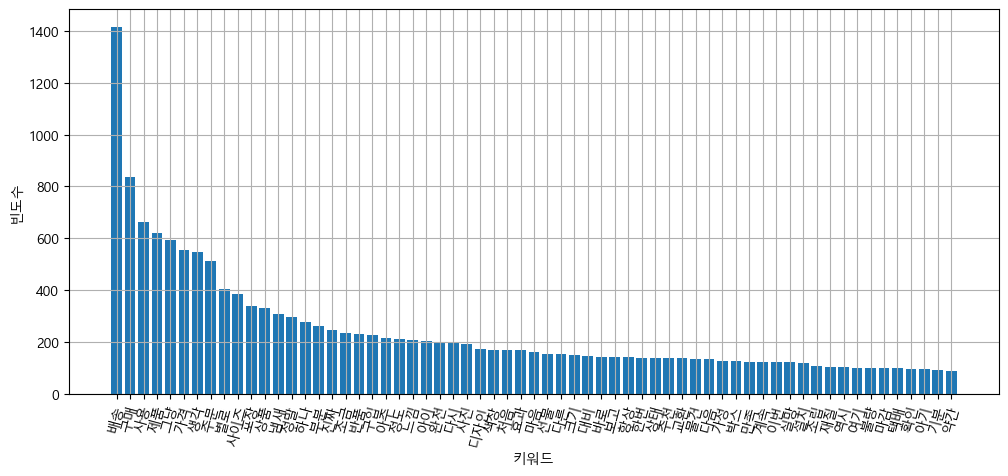

In [54]:
plt.figure(figsize = (12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 75)
plt.show()

In [56]:
#워드 클라우드를 위해 자주 나타난 상위 400개의 단어를 가져옴

word_count = dict()
for tag, counts in count.most_common(400):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

배송 : 1413
구매 : 836
사용 : 664
제품 : 620
그냥 : 595
가격 : 556
생각 : 546
주문 : 511
별로 : 404
사이즈 : 387
포장 : 341
상품 : 333
냄새 : 308
정말 : 297
하나 : 279
부분 : 262
진짜 : 248
조금 : 236
반품 : 231
구입 : 229
아주 : 217
정도 : 211
느낌 : 207
아이 : 203
완전 : 199
다시 : 195
사진 : 194
디자인 : 173
색상 : 170
처음 : 169
효과 : 169
마음 : 162
선물 : 154
다른 : 154
크기 : 151
대비 : 148
바로 : 143
보고 : 143
항상 : 142
한번 : 140
상태 : 140
추천 : 139
교환 : 138
물건 : 136
다음 : 136
가성 : 127
박스 : 126
만족 : 125
계속 : 123
이번 : 123
실망 : 122
설치 : 119
조립 : 110
재질 : 105
역시 : 105
여기 : 102
불량 : 101
마감 : 101
택배 : 99
확인 : 97
아기 : 97
기분 : 93
약간 : 90
판매 : 90
최고 : 89
먹기 : 88
살짝 : 88
시간 : 86
일단 : 84
착용 : 84
하루 : 82
사서 : 81
이건 : 81
고정 : 78
후기 : 78
설명 : 75
매우 : 75
길이 : 74
사람 : 74
쓰기 : 74
신경 : 74
먼지 : 72
추가 : 71
때문 : 71
걱정 : 68
리뷰 : 68
거의 : 68
소리 : 67
연락 : 66
최악 : 66
여름 : 66
머리 : 66
문제 : 66
달라 : 66
금방 : 65
도착 : 65
처리 : 65
제대로 : 65
듭니 : 64
다리 : 63
구멍 : 63
지금 : 61
화면 : 60
자주 : 60
충전 : 60
원래 : 60
품질 : 58
세탁 : 58
모두 : 57
가방 : 57
케이스 : 56
참고 : 56
환불 : 56
두번째 : 56
이용 : 53
전혀 : 53
다만 : 53


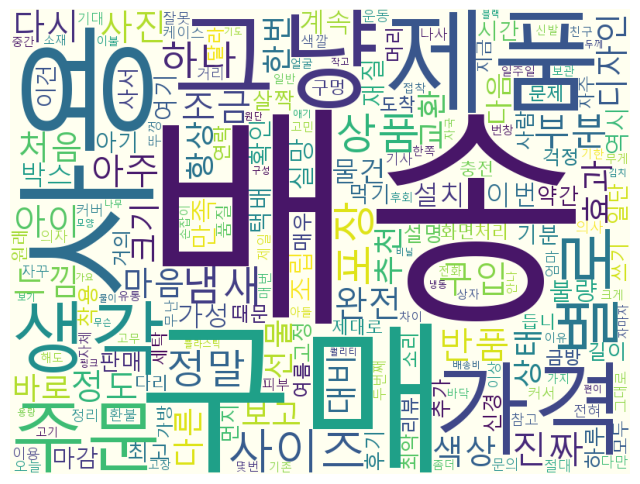

In [58]:
wc = WordCloud(font_path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

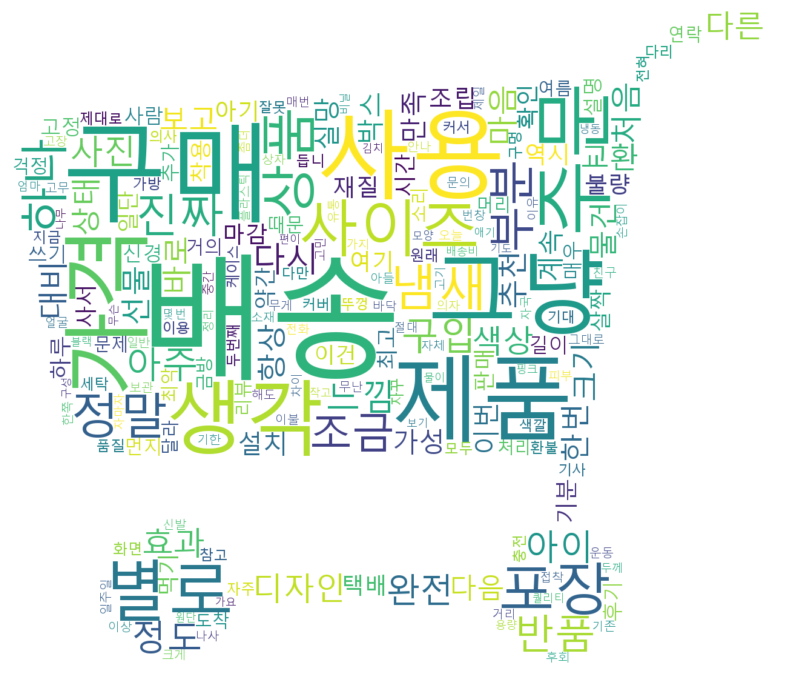

In [66]:
# https://lovit.github.io/nlp/2018/04/17/word_cloud/
from PIL import Image
import numpy as np

mask = np.array(Image.open("shopping-cart-349544_1280.jpg"))

wordcloud = WordCloud(
    #폰트 경로를 지정하지 않으면 한글이 깨진다.
    font_path = "c:/Windows/fonts/malgun.ttf",
    width = 800,
    height = 800,
    background_color="white",
    mask = mask,
)

wordcloud = wordcloud.generate_from_frequencies(word_count)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 1) 별점 확인하기

In [77]:
ratings = total_data['ratings'].value_counts().sort_index()
ratings

ratings
1    36048
2    63989
4    18786
5    81177
Name: count, dtype: int64

### 2) 별점별 리뷰 확인하기

In [101]:
# 데이터가 너무 많아서 처리가 힘드므로, 1만 개의 리뷰만 가져옴
reviews = ''
for item in total_data[total_data['ratings']==1]['reviews'].iloc[0:10001]:
    reviews += re.sub(r'[^\w]', ' ', item) + ' '
# 품사 태깅
nlp = Okt()
reviews_N = nlp.nouns(reviews)
count = Counter(reviews_N)

배송 : 1645
구매 : 1016
사용 : 706
가격 : 615
제품 : 547
주문 : 537
생각 : 404
아주 : 379
사이즈 : 349
포장 : 336
정말 : 329
아이 : 294
항상 : 281
구입 : 255
선물 : 247
디자인 : 238
마음 : 230
추천 : 219
진짜 : 215
만족 : 214
가성 : 204
상품 : 203
조금 : 194
완전 : 192
하나 : 189
최고 : 173
색상 : 169
대비 : 167
다음 : 166
아기 : 150
처음 : 148
느낌 : 148
크기 : 147
역시 : 138
계속 : 137
바로 : 136
설치 : 133
냄새 : 133
효과 : 131
여기 : 125
사진 : 120
정도 : 120
보고 : 115
매우 : 107
듭니 : 103
쓰기 : 101
정리 : 101
걱정 : 100
한번 : 94
그냥 : 89
먹기 : 89
이번 : 88
다른 : 88
자주 : 87
물건 : 83
엄마 : 82
다시 : 82
조립 : 82
추가 : 80
이용 : 79
상태 : 77
두번째 : 77
매번 : 76
번창 : 75
하루 : 75
착용 : 75
친구 : 74
재질 : 74


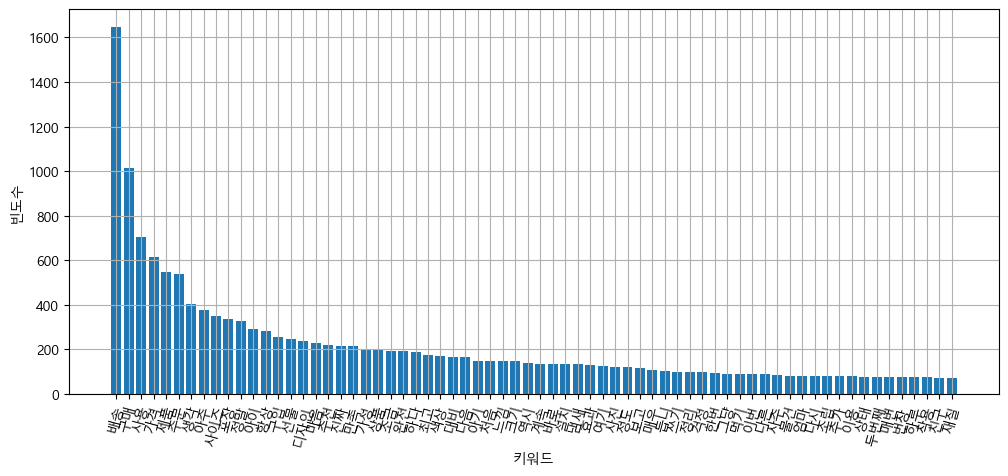

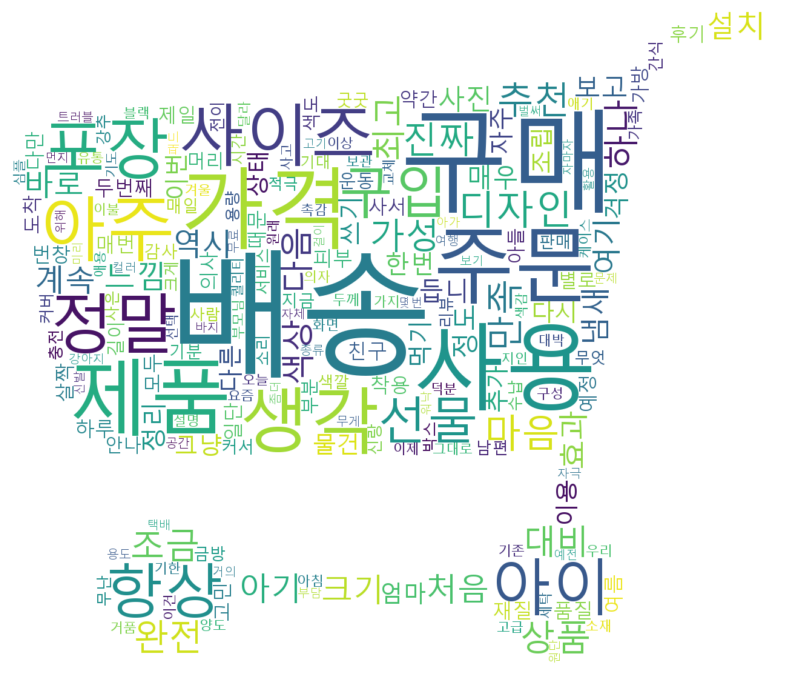

In [95]:
#막대 그래프로 나타내기 위해 자주 나타난 상위 100개 단어만 비교
word_count = dict()
for tag, counts in count.most_common(100):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)
plt.figure(figsize = (12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 75)
plt.show()


#워드 클라우드를 위해 자주 나타난 상위 400개의 단어를 가져옴

word_count = dict()
for tag, counts in count.most_common(400):
    if(len(str(tag))>1):
        word_count[tag] = counts

# https://lovit.github.io/nlp/2018/04/17/word_cloud/
from PIL import Image
import numpy as np

mask = np.array(Image.open("shopping-cart-349544_1280.jpg"))

wordcloud = WordCloud(
    #폰트 경로를 지정하지 않으면 한글이 깨진다.
    font_path = "c:/Windows/fonts/malgun.ttf",
    width = 800,
    height = 800,
    background_color="white",
    mask = mask,
)

wordcloud = wordcloud.generate_from_frequencies(word_count)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

배송 : 1530
사용 : 881
구매 : 794
가격 : 785
생각 : 717
제품 : 545
조금 : 465
주문 : 428
사이즈 : 419
포장 : 355
아이 : 314
대비 : 281
구입 : 266
아주 : 249
가성 : 246
상품 : 244
디자인 : 239
느낌 : 217
냄새 : 216
색상 : 214
부분 : 211
선물 : 207
크기 : 202
그냥 : 190
마음 : 184
정도 : 184
처음 : 182
정말 : 180
약간 : 179
효과 : 173
다만 : 172
하나 : 150
아기 : 148
설치 : 144
추천 : 144
만족 : 139
보고 : 136
사진 : 136
다음 : 135
다른 : 127
재질 : 127
살짝 : 126
먹기 : 126
항상 : 121
일단 : 121
조립 : 114
상태 : 112
진짜 : 109
쓰기 : 104
계속 : 104
한번 : 103
여름 : 103
바로 : 102
별로 : 96
무난 : 92
길이 : 89
걱정 : 87
색깔 : 87
정리 : 87
품질 : 85
이번 : 84
자주 : 82
물건 : 81
착용 : 81
후기 : 81
완전 : 79
다시 : 77
여기 : 74


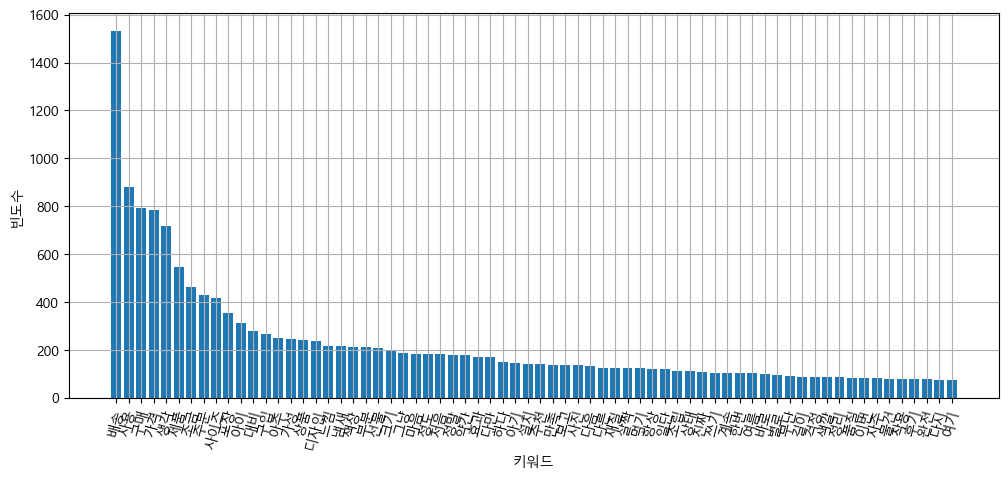

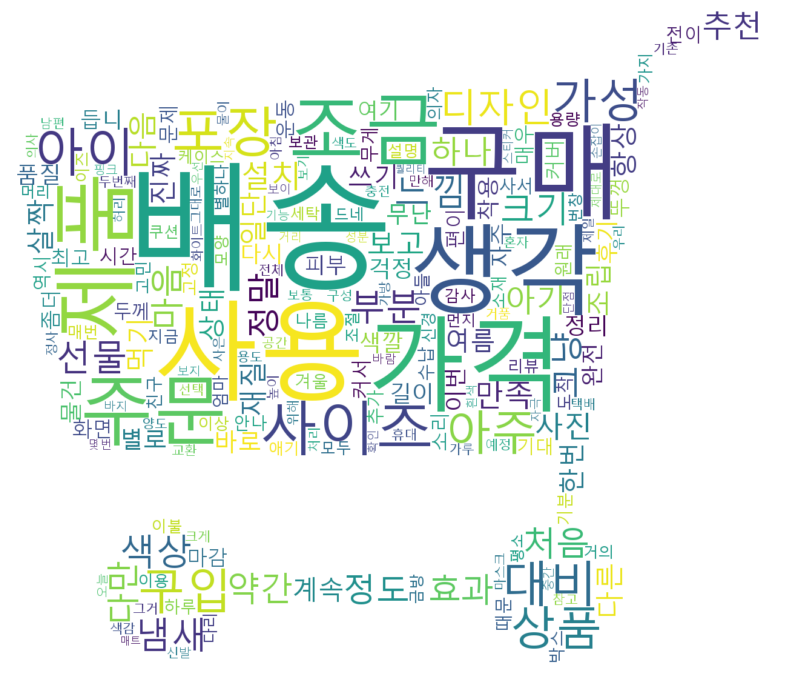

In [99]:
#막대 그래프로 나타내기 위해 자주 나타난 상위 100개 단어만 비교
word_count = dict()
for tag, counts in count.most_common(100):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)
plt.figure(figsize = (12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 75)
plt.show()


#워드 클라우드를 위해 자주 나타난 상위 400개의 단어를 가져옴

word_count = dict()
for tag, counts in count.most_common(400):
    if(len(str(tag))>1):
        word_count[tag] = counts

# https://lovit.github.io/nlp/2018/04/17/word_cloud/
from PIL import Image
import numpy as np

mask = np.array(Image.open("shopping-cart-349544_1280.jpg"))

wordcloud = WordCloud(
    #폰트 경로를 지정하지 않으면 한글이 깨진다.
    font_path = "c:/Windows/fonts/malgun.ttf",
    width = 800,
    height = 800,
    background_color="white",
    mask = mask,
)

wordcloud = wordcloud.generate_from_frequencies(word_count)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

배송 : 1232
그냥 : 1070
별로 : 819
제품 : 757
구매 : 708
사용 : 664
반품 : 548
주문 : 527
생각 : 456
상품 : 444
냄새 : 442
포장 : 397
진짜 : 389
부분 : 388
하나 : 379
가격 : 375
사이즈 : 361
정말 : 339
교환 : 322
정도 : 310
완전 : 296
최악 : 259
한번 : 258
처음 : 257
다시 : 257
실망 : 257
물건 : 227
불량 : 226
다른 : 222
사진 : 217
상태 : 214
보고 : 210
박스 : 202
확인 : 198
택배 : 198
바로 : 182
느낌 : 167
구입 : 166
리뷰 : 165
제대로 : 162
판매 : 161
효과 : 159
이건 : 158
연락 : 156
환불 : 153
절대 : 151
기분 : 151
전혀 : 150
여기 : 146
조금 : 139
마감 : 138
계속 : 137
시간 : 130
이번 : 129
구멍 : 118
사지 : 116
색상 : 116
조립 : 116
처리 : 115
전화 : 114
아주 : 113
일주일 : 112
고정 : 111
고장 : 111


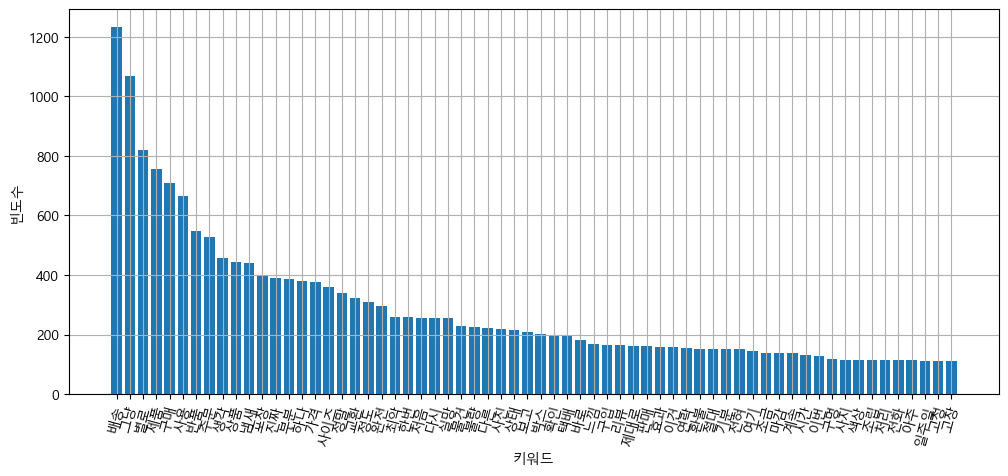

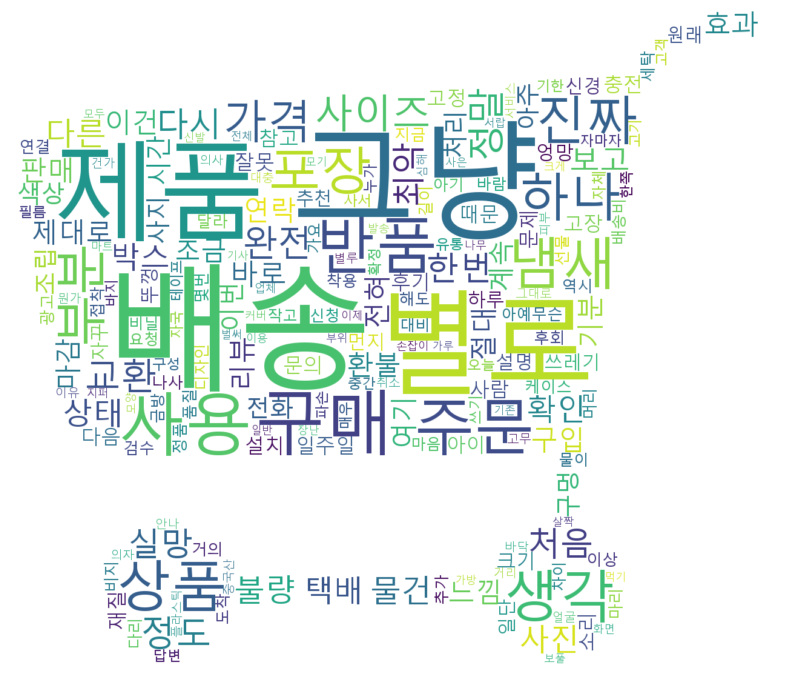

In [103]:
#막대 그래프로 나타내기 위해 자주 나타난 상위 100개 단어만 비교
word_count = dict()
for tag, counts in count.most_common(100):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)
plt.figure(figsize = (12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 75)
plt.show()


#워드 클라우드를 위해 자주 나타난 상위 400개의 단어를 가져옴

word_count = dict()
for tag, counts in count.most_common(400):
    if(len(str(tag))>1):
        word_count[tag] = counts

# https://lovit.github.io/nlp/2018/04/17/word_cloud/
from PIL import Image
import numpy as np

mask = np.array(Image.open("shopping-cart-349544_1280.jpg"))

wordcloud = WordCloud(
    #폰트 경로를 지정하지 않으면 한글이 깨진다.
    font_path = "c:/Windows/fonts/malgun.ttf",
    width = 800,
    height = 800,
    background_color="white",
    mask = mask,
)

wordcloud = wordcloud.generate_from_frequencies(word_count)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()